# Task 1
prediction using supervised ML

Predict the percentage of marks depend upon the no of study hours


In [ ]:
#loading the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# loading the dataset
dataset=pd.read_excel(r"C:\Users\ABC\Desktop\data science\dataset.xlsx")

In [156]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [98]:
#discover and visualize the data
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [157]:
#information:understanding the datatypes, null values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


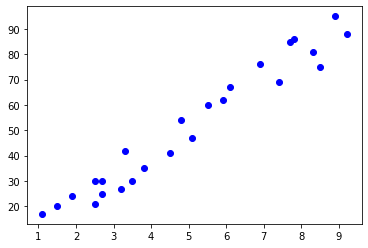

In [100]:
plt.scatter(x=dataset['Hours'],y=dataset['Scores'],color='blue')

In [101]:
#data cleaning
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [102]:
dataset.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [103]:
dataset2=dataset.fillna(dataset.mean())
dataset2.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [104]:
dataset2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [105]:
np.corrcoef(dataset.Hours,dataset.Scores)

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

In [106]:
import statsmodels.formula.api as smf
#simple linear regression
model=smf.ols('Hours ~ Scores',data=dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Hours   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 08 May 2021   Prob (F-statistic):           9.13e-17
Time:                        17:26:39   Log-Likelihood:                -19.914
No. Observations:                  25   AIC:                             43.83
Df Residuals:                      23   BIC:                             46.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0063      0.258     -0.024      0.981      -0.540       0.528
Scores         0.0975      0.005     21.583      0.000       0.088       0.107
==============================================================================
Omnibus:                        4.088   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.129   Jarque-Bera (JB):                1.980
Skew:                           0.388   Prob(JB):                        0.372
Kurtosis:                       1.860   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
#splitting the data for training
x=dataset2.drop("Scores",axis="columns")
y=dataset2.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [110]:
#Spliting the data train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=51)

In [111]:
print("shape of x train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x test",x_test.shape)
print("shape of y test",y_test.shape)

shape of x train (20, 1)
shape of y train (20, 1)
shape of x test (5, 1)
shape of y test (5, 1)


In [112]:
#now let's checkout train dataset
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [113]:
lr.coef_

array([[9.56433743]])

In [114]:
lr.intercept_

array([2.70197068])

In [115]:
m=3.93
c=8.8817
y=m*12+c
y

56.041700000000006

In [116]:
lr.predict([[7]])[0][0].round(2)

69.65

In [117]:
y_pred=lr.predict(x_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [118]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["Hours","Scores_original","Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [119]:
#fine tunning the table
lr.score(x_test,y_test) #our model is giving the accuracy of 92.3%

0.9238518102278777

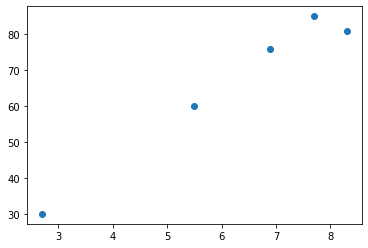

In [120]:
plt.scatter(x_test,y_test)

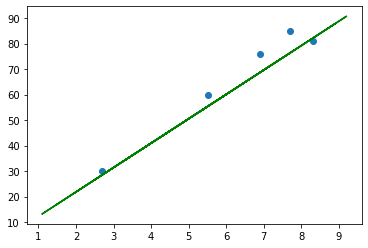

In [121]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="green")

In [136]:
import joblib
joblib.dump(lr,"Scores_predictor.pk1")

['Scores_predictor.pk1']

In [137]:
model=joblib.load("Scores_predictor.pk1")

In [142]:
model.predict([[9.25]])

array([[91.17209195]])